#   经典又有趣的Kaggle案例[泰坦尼克号问题](https://www.kaggle.com/c/titanic

    这是个经典的机器学习案例，也是个真实的灾难事件，也有很多课程都是用了这个题目，我们可以通过这个案例学习机器学习的所有过程。泰坦尼克号是大家都熟悉的『Jack and Rose』的故事，1912 年 4 月 15 日，泰坦尼克号在处女航中撞上冰山 要沉了，大家都惊恐逃生，可是救生艇的数量有限，无法人人都有的， 当时共识是妇女儿童优先，也就是和年龄性别等因素相关，所以每个人存活的概率是不同的，最后因为救生资源有限，头等舱的优先，最后2224 名乘客和船员中 1502 人遇难，非常遗憾，仅不到一半的人生还。
   ![](https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=2302680136,1627973922&fm=26&gp=0.jpg)  
     
    
训练和测试数据是一些乘客的个人信息以及存活状况，要尝试根据它生成合适的模型并预测其他人的存活状况。 
可以知道这是一个二分类问题（死亡 或 生存） ，可以选用各种分类算法解决。  
    先喊下口号，了解下业务问题,看数据字段的描述初步了解：
- PassengerId: 编号，一个用以标记每个乘客的数字id
- Survived: 0 = 死亡，1 = 生存，也就是要预测的target
- Pclass: 船票级别 1 = 高级， 2 = 中等， 3 = 低等。标记所在船舱的级别，电影里我们看到头等舱就是高级，再最上面，最接近甲板，低等仓再最下层。
- Name: 名称
- Sex: male = 男性，female = 女性
- Age: 年龄
- SibSp: 在 Titanic 上的兄弟姐妹以及配偶的人数
- Parch: 在 Titanic 上的父母以及子女的人数
- Ticket: 船票编号
- Fare: 乘客为此票付的费用
- Cabin: 所在的船舱
- Embarked: 登船的港口 C = Cherbourg, Q = Queenstown, S = Southampton，乘客从哪个地方登上泰坦尼克号


最开始我们要看各个特征字段和预测字段之间的逻辑关系。
我们都知道妇女和儿童更可能被救。因此，年龄和性别很可能更好的帮助我们预测。认为乘客的船层可能会影响结果也是符合逻辑的，因为第一层的船舱更靠近船的甲板，我们电影里也看到rose更早知道事故，并先和上层的朋友们准备逃生，而jack和他朋友们在下层最后才得以逃出来。Fare票价和乘客所住船层相关，而且可能是高度相关的，但是也可能会增加一些额外的信息。SibSp、Parch兄弟姐妹、配偶、父母/孩子的数量很可能关系到是否被某一个或很多个人救，会有很多人去帮助你或者有很多人想到你尝试去救你。
像Embarked登船(也许有一些信息和怎么靠近船的顶部的人的船舱有关),Ticket票号和Name名字相对关系不大，可以不作为选择的特征。
这一步通常是习得相关的领域知识，了解业务，这对于绝大多数机器学习任务来说非常非常非常的重要。
所以接下来总体看下数据情况

## 数据预览
###  读入数据
口号喊完了，开始具体看下数据长什么样吧


In [2]:
# -*- coding: UTF-8 -*-
"""
此脚本用于展示数据初探，读入数据
"""

# 保证脚本与Python3兼容
from __future__ import print_function

import os   #读取数据文件
import sys
import datetime
import numpy as np  #科学计算
import matplotlib.pyplot as plt  #画图包
import pandas as pd   #做初步统计分析
from collections import Counter #统计包

import warnings
warnings.filterwarnings("ignore")  #忽略警告
 
%matplotlib inline   

def readData(path):
    """
    使用pandas读取数据
    """
    data = pd.read_csv(path)
    cols = list(data.columns.values)
    return data[cols]
     
 
def visualData(data):
    """
    画直方图，直观了解数据
    """
    data.hist(
        rwidth=0.9, grid=True, figsize=(8, 8), alpha=0.6,bins=10, color="blue")
    plt.show()
 
def sample_class_show(y,savepath='res.png'):
    '''
    绘制饼图，y是标签列表,多分类时候常用
    '''
    target_stats=Counter(y)
    labels=list(target_stats.keys())
    sizes = list(target_stats.values())
    explode=tuple([0.1]*len(target_stats))
    fig,ax  = plt.subplots()
    ax.pie(sizes,explode=explode,labels=labels,shadow=True,autopct='%1.1f%%')
    ax.axis('equal')
    plt.savefig(savepath)
    
if __name__ == "__main__":
    # 设置显示格式
    pd.set_option('display.width', 1000)
    homePath = os.path.dirname(os.path.abspath('__file__'))
    # Windows下的存储路径与Linux并不相同
    if os.name == "nt":
        dataPath = "%s\\input\train.csv" % homePath
    else:
        dataPath = "%s//input/train.csv" % homePath
    train = readData(dataPath)
    #train = train.drop_duplicates()

    if os.name == "nt":
        dataPath = "%s\\input\test.csv" % homePath
    else:
        dataPath = "%s/input/test.csv" % homePath
    test = readData(dataPath)
    
    print(train.columns) #显示各个字段
    #显示前5行
    print(train.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    mal

从上面的结果可以看到，在这些列中数值型和类别型特征的列分别为：
- 数值型： Age, Fare. Discrete: SibSp, Parch；
- 类别型： Survived, Sex, and Embarked. Ordinal: Pclass.

In [3]:
#看特征数
features = list(set(train.columns) - set(['PassengerId','Survived']))

target = 'Survived' 

Id = 'PassengerId'

#查看样本数和特征数
print(train[features].shape)
    
# 查看数据的前5行
#这个只能大概看下数据长什么样
print(train[features].head())
    # 查看每一列的计数及数据类型等信息

(891, 10)
                                                Name   Age Embarked Cabin  Parch     Fare            Ticket     Sex  SibSp  Pclass
0                            Braund, Mr. Owen Harris  22.0        S   NaN      0   7.2500         A/5 21171    male      1       3
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0        C   C85      0  71.2833          PC 17599  female      1       1
2                             Heikkinen, Miss. Laina  26.0        S   NaN      0   7.9250  STON/O2. 3101282  female      0       3
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0        S  C123      0  53.1000            113803  female      1       1
4                           Allen, Mr. William Henry  35.0        S   NaN      0   8.0500            373450    male      0       3


###  查看数据列类型和统计信息
从下面数据个数也可以看出哪些列有缺失的，Age，Embarked，Cabin都少于891个。
训练数据中总共有891名乘客，但是很不幸，我们有些属性的数据不全，比如说：
Age（年龄）属性只有714名乘客有记录，
Cabin（客舱）更是只有204名乘客是已知的

<font color=red> 得到数值型数据的一些分布：Sex、Embarked，ticket和Cabin是object类型，最后需要转为数值。(因为有些属性，比如姓名，是文本型；而另外一些属性，比如登船港口，是类目型。pandas都读取为object了 <font>

In [4]:
print(train[features].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Name        891 non-null object
Age         714 non-null float64
Embarked    889 non-null object
Cabin       204 non-null object
Parch       891 non-null int64
Fare        891 non-null float64
Ticket      891 non-null object
Sex         891 non-null object
SibSp       891 non-null int64
Pclass      891 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB
None


### 查看总体数据统计信息
这里注意describe只显示了数值型数据，其它数据是无法显示

              Age       Parch        Fare       SibSp      Pclass
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118    0.381594   32.204208    0.523008    2.308642
std     14.526497    0.806057   49.693429    1.102743    0.836071
min      0.420000    0.000000    0.000000    0.000000    1.000000
25%     20.125000    0.000000    7.910400    0.000000    2.000000
50%     28.000000    0.000000   14.454200    0.000000    3.000000
75%     38.000000    0.000000   31.000000    1.000000    3.000000
max     80.000000    6.000000  512.329200    8.000000    3.000000
0    549
1    342
Name: Survived, dtype: int64


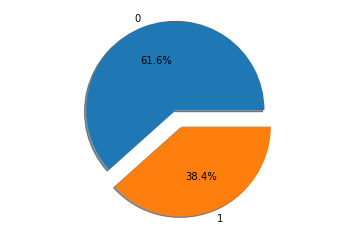

In [5]:
print(train[features].describe())
    
print(train[target].value_counts())
    #可视化
sample_class_show(train[target],savepath='label_distribution.png')

从上面的结果可以知道每一份数值型特征的基本统计信息，包括计数（count）、均值（mean）、方差（std）等。接下来显示类别特征：

In [6]:
#显示类别特征
train[features].describe(include=['O'])

,Name,Embarked,Cabin,Ticket,Sex
count,891,889,204,891,891
unique,891,3,147,681,2
top,"Harder, Mr. George Achilles",S,G6,1601,male
freq,1,644,4,7,577


上表可以看出，name有891个不同取值，所以也证实是唯一的，也是没有区分度的特征，可以去掉；
同时也可以看出有577个为男性male。

## 数据清洗

这阶段是基于上面的了解后真正开始处理数据了，主要是看数据缺失和异常数据，包括离群点、缺失值、偏态数据

从之前描述已经知道主要三个特征空值要处理，现在更具体的针对性处理这几个特征

In [7]:
train.isnull().sum()  #查看 null 值，查看非空使用 notnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#看数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


根据缺失和特性，我们开始设定具体处理目标
*   Cabin, Embarked ，Sex 等特征值数值化
*   Ticket 等高维数据降维处理并将特征值数值化
*   Fare，Age 等为连续数据，之后需要检查是否是偏态数据
*   PassengerId ,Name 为无用特征，要删除

In [9]:
#选择的特征
selected = list(set(features)-set(['PassengerId','Name']))
selected

['Embarked',
 'Age',
 'Cabin',
 'Parch',
 'Fare',
 'Ticket',
 'SibSp',
 'Sex',
 'Pclass']

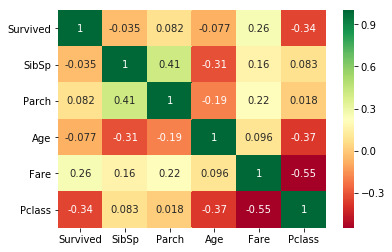

In [10]:
#corr() 计算相关系数，cmap 选择 color map，annot=True 显示相关系数
#相关系数r的绝对值一般在0.8以上，认为A和B有强的相关性。0.3到0.8之间，可以认为有弱的相关性。0.3以下，认为没有相关性。
import seaborn as sns
g=sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare','Pclass']].corr(),cmap='RdYlGn',annot=True) 

可以看到Pclass、Fare 和 Survived 有较大的正相关性。但这并不能说明其它的特征与 Survived 无关。

### 缺失值
根据不同的情况，可以使用中位数、平均值、众数填充，删除、新类指派等方法处理缺失数据，更复杂的还有建模预测。
如果missing value占总体的比例非常小，那么直接填入Mean、Mode或者Median  
如果missing value所占比例大，那么直接将miss value当做一种特殊的情况，另取一个值填入   
预测模型是处理缺失值的复杂方法之一， 通过创建一个预测模型来估计替代缺失值。 在这种情况下，我们将数据集分为两组：一组没有变量的缺失值，另一组有缺少值， 第一个数据集成为模型的训练数据集，而具有缺失值的第二个数据集是测试数据集，变量与缺失值被视为目标变量。 接下来，我们创建一个模型，根据训练数据集的其他属性预测目标变量，并填充测试数据集的缺失值。我们可以使用回归，方差分析，逻辑回归和各种建模技术来执行此操作。 这种方法有两个缺点：

模型估计值通常比真实值更好  
如果与数据集中的属性和缺少值的属性没有关系，则该模型对于估计缺失值将不精确。 

#### Age
作图 Age ~ Survived。年龄较小的孩子生存的几率大。补充缺失值后，我们必须检查是否对 Age ~ Survived 的性质产生影响。

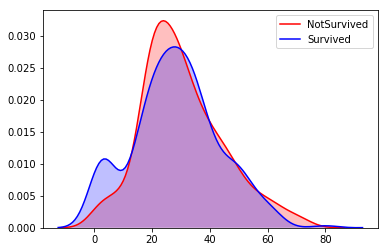

In [11]:
Age0=train[(train['Survived']==0)&(train['Age'].notnull())]['Age'] #死亡乘客的 Age 数据
Age1=train[(train['Survived']==1)&(train['Age'].notnull())]['Age'] #生存乘客的 Age 数据
g=sns.kdeplot(Age0,legend=True,shade=True,color='r',label='NotSurvived') #死亡乘客年龄概率分布图， shade=True 设置阴影
g=sns.kdeplot(Age1,legend=True,shade=True,color='b',label='Survived') #生存乘客概率分布图

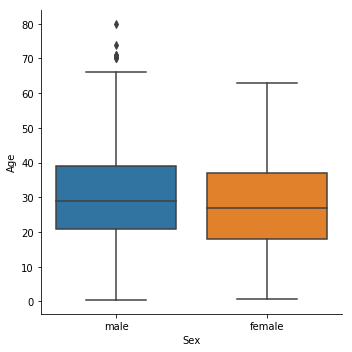

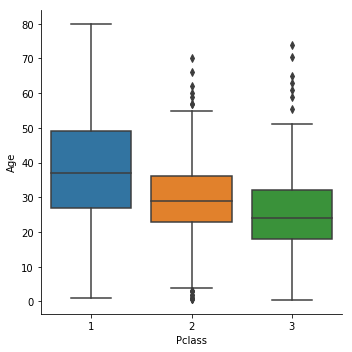

In [12]:
#根据 heatmap, Age 和 SibSp, Parch, Pclass 相关性高，我们再用箱型图直观感受下，以图形 Sex ~ Age, Pclass ~ Age 为例。
g=sns.factorplot(x='Sex',y='Age',data=train,kind='box') 
g=sns.factorplot(x='Pclass',y='Age',data=train,kind='box')

面两图说明男性和女性的年龄分布（指箱型图中的五条线，从上到下依次是最大值、四分位数、中位数、四分位数、最小值）基本一致，而购买不同等级票的人的年龄分布是不同的。所以，我们根据票的等级将数据分为不同的集合，再用缺失数据所在集合的平均值来进行填充，并检查填充后 Age ~ Survived 是否受到影响。也就是说我们假设是同一个等级的人年龄是比较接近的一类。

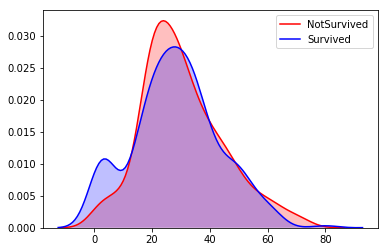

In [13]:
index = list(train[train['Age'].isnull()].index) #Age 缺失样例的 index
Age_median = train[train['Age'].notnull()]['Age'].median() #求平均值
copy_data = train.copy()
for i in index:  #缺失样例的三个变量相等的组成一组
    filling_age = np.mean(copy_data[(copy_data['Pclass'] == copy_data.iloc[i]['Pclass'])
                                    & (copy_data['SibSp'] == copy_data.iloc[i]['SibSp'])
                                    & (copy_data['Parch'] == copy_data.iloc[i]['Parch'])
                                    ]['Age'])
    if not np.isnan(filling_age): # filling_age 非空为真
        train['Age'].iloc[i] = filling_age #填充 null 值
    else: # filling_age 空为真
        train['Age'].iloc[i] = Age_median  #如果还是空就用中位数
g = sns.kdeplot(Age0, legend=True, shade=True, color='r', label='NotSurvived')
g = sns.kdeplot(Age1, legend=True, shade=True, color='b', label='Survived')

####  Embarked
对于只有极少数缺失值的特征，我们可以选择删除该样例，使用众数、均值、中位数填充。

In [14]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
map_embarked = {'C':1,'Q':2,'S':3}
train['Embarked']=train['Embarked'].map(map_embarked)

#### Cabin
这类数据不同值也很多，有的就是直接去除，但是我们可以发现潜在的规律，可能得到一些隐藏信息。
对于这种复杂，高维的数据，我们需要挖掘它的规律。例如 Cabin 特征值由字母开头，判断船舱按字母分为 A，B，C...

于是我们仅提取字母编号，降低维度。然后使用新的字母‘U’填充缺失数据。

In [15]:
train[train['Cabin'].notnull()]['Cabin'].head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

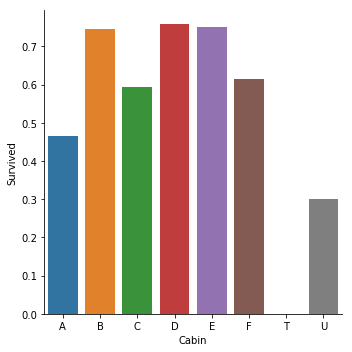

In [16]:
# fillna() 填充 null 值 指派为U
train['Cabin'].fillna('U',inplace=True) 

# 使用 lambda 表达式定义匿名函数对 i 执行 list(i)[0]。map() 指对指定序列 data ['Cabin'] 进行映射，对每个元素执行 lambda 
train['Cabin']=train['Cabin'].map(lambda i: list(i)[0])   #取首字母

# kind='bar' 绘制条形图，ci=False 不绘制概率曲线，order 设置横坐标次序
g = sns.factorplot(x='Cabin',y='Survived',data=train,ci=False,kind='bar',order=['A','B','C','D','E','F','T','U']) 

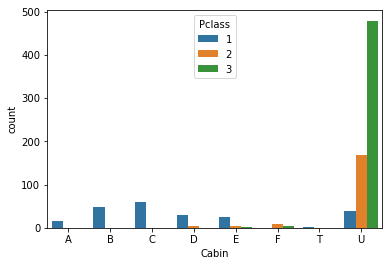

In [17]:
g = sns.countplot(x='Cabin',hue='Pclass',data=train,order=['A','B','C','D','E','F','T','U']) # hue='Pclass' 表示根据 'Pclass' 进行分类
#缺失数据的游客主要是三等舱的，并且这部分游客的生存率相对较低,就是jack和他们朋友们了。

### 偏态分布

对类别特征或数据我们一般就是说不平衡的，如果是数值型我们常也可以叫做偏态数据(skewed)，偏态就是说和原来曲线偏离大。偏态分布的数据有时不利于模型发现数据中的规律，我们可以使用 Log Transformation 来处理数据，就是一般用logX或log(1+X)来使得数据基本接近正态分布。


#### Fare

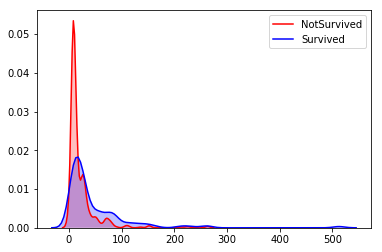

In [18]:
g=sns.kdeplot(train[train['Survived']==0]['Fare'],shade='True',label='NotSurvived',color='r') # 死亡乘客 'Fare' 分布
g=sns.kdeplot(train[train['Survived']==1]['Fare'],shade='True',label='Survived',color='b') # 生存乘客 'Fare' 分布

Fare 属于右偏态分布，Python 提供了计算数据偏态系数的函数 skew(), 计算值越大，数据偏态越明显。使用 Log Transformation 后，我们看到计算值从 4.79 降到 0.39。kdeplot可以画概率分布图。

Skew Coefficient:0.39


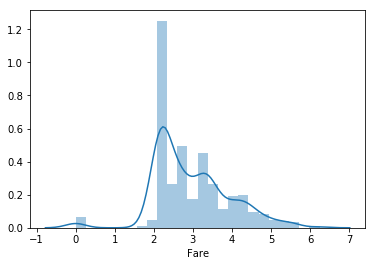

In [19]:
train['Fare']=train['Fare'].map(lambda i:np.log(1+i) if i>0 else 0) #map(lambda i:np.log(i) ) # 匿名函数为对非零数据进行 Log Transformation，否则保持零值
g=sns.distplot(train['Fare'])
print('Skew Coefficient:%.2f' %(train['Fare'].skew())) # skew() 计算偏态系数

### 数值化和标准化
#### Ticket
Ticket 特征值中的一串数字编号对我们没有意义，忽略。下面代码中，我们用正则表达式过滤掉这串数字，并使用 pandas get_dummies 函数进行数值化（以 Ticket 特征值 作为新的特征，0,1 作为新的特征值）

In [20]:
Ticket=[]
import re
r=re.compile(r'\w*')#正则表达式，查找所有单词字符[a-z/A-Z/0-9]
for i in train['Ticket']:
    sp=i.split(' ')#拆分空格前后字符串，返回列表
    if len(sp)==1:
       Ticket.append('U')#对于只有一串数字的 Ticket，Ticket 增加字符 'U'
    else:
       t=r.findall(sp[0])#查找所有单词字符，忽略符号，返回列表
       Ticket.append(''.join(t))#将 t 中所有字符串合并
train['Ticket']=Ticket
#get_dummies：如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）
train=pd.get_dummies(train,columns=['Ticket'],prefix='T')

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_U', 'T_WC', 'T_WEP'], dtype='object')

#### Sex
Sex 只有 male, female 两个特征值，用 0 替代 male, 1 替代 female。

In [22]:
sex_map = {'female': 1, 'male': 0}
train['Sex']=train['Sex'].map(sex_map)

###  离群值/异常值分析
离群点是显著偏离数据集中其余对象的点。离群点来源于操作失误，数据本身的可变性等。在不同的环境中，离群点扮演不同角色。例如一个人的年龄 300 岁，应予以删除，而某些环境中，我们却需要探测、研究离群点，例如欺诈检测。在很多异常检测场景里，异常值一般会归为一类，不能随便删除。这里看Age、Parch和SibSp的区间还是较为正常。

In [23]:
#我们这里采用箱线法, 检测特征 ['Fare'] 的离群点
#四分位法
 
# 这里规避A value is trying to be set on a copy of a slice from a DataFrame
train = train.copy()
# 这里将大于上四分位数(Q3)的设定为异常值
# df_['isOutlier'] = s > s.quantile(0.75)
Q1 = np.percentile(train['Fare'], 25)
# 3rd quartile (75%)
Q3 = np.percentile(train['Fare'], 75)
# quartile spacing (IQR)
IQR = Q3 - Q1
# outlier step
outlier_step = 1.5 * IQR

# Determine a list of indices of outliers for feature col
#train['FareIsOutlier'] = (train['Fare'] < Q1 - outlier_step) | (train['Fare'] > Q3 + outlier_step) 
col = train[((train['Fare'] < Q1 - outlier_step) | (train['Fare'] > Q3 + outlier_step))].index
col_low = train[train['Fare'] < Q1 - outlier_step].index
df_rst = train.loc[col]

# 查异常的数据
#df_rst = train[train['FareIsOutlier'] == True]
print(df_rst)

     PassengerId  Survived  Pclass                                               Name  Sex        Age  SibSp  Parch      Fare Cabin  ...  T_SOPP  T_SOTONO2  T_SOTONOQ  T_SP  T_STONO  T_STONO2  T_SWPP  T_U  T_WC  T_WEP
27            28         0       1                     Fortune, Mr. Charles Alexander    0  19.000000      3      2  5.575949     C  ...       0          0          0     0        0         0       0    1     0      0
88            89         1       1                         Fortune, Miss. Mabel Helen    1  23.000000      3      2  5.575949     C  ...       0          0          0     0        0         0       0    1     0      0
118          119         0       1                           Baxter, Mr. Quigg Edmond    0  24.000000      0      1  5.515527     B  ...       0          0          0     0        0         0       0    0     0      0
179          180         0       3                                Leonard, Mr. Lionel    0  36.000000      0      0  0.000000   

In [24]:
#异常值处理
#如果小于Q1-1.5*IQR则用Q1-1.5*IQR代替，如果大于Q3+1.5*IQR则用Q3+1.5*IQR替换

for ind in col:
    if ( train.loc[ind]['Fare'] <  Q1 - outlier_step ):
        train = train.copy()
        train.loc[ind]['Fare'] =  Q1 - outlier_step
    else :
        train.loc[ind]['Fare'] = Q3 + outlier_step
print(train.loc[col]['Fare'])

27     5.575949
88     5.575949
118    5.515527
179    0.000000
258    6.240917
263    0.000000
271    0.000000
277    0.000000
299    5.515527
302    0.000000
311    5.573579
341    5.575949
380    5.431646
413    0.000000
438    5.575949
466    0.000000
481    0.000000
527    5.406181
557    5.431646
597    0.000000
633    0.000000
674    0.000000
679    6.240917
700    5.431646
716    5.431646
732    0.000000
737    6.240917
742    5.573579
806    0.000000
815    0.000000
822    0.000000
Name: Fare, dtype: float64


## 数据挖掘（特征工程）


### 家庭人数特征
进一步对数据特征深入分析，数据挖掘出可能与存活率相关的信息。原始数据集的 SibSp 列表示乘客含有多少个兄弟姐妹或配偶，在Parch 列中，记录的是一个乘客含有多少个父母或孩子。将这两者相加，再加上他自己就可以得到一个家庭的总人数。提取这个特征的原因是，有可能获救的人都是一个家庭的。另外一个可能原因也是考虑，逃生的时候一个人一般来说就更方便自如，没有顾虑，而拖家带口就会影响。

In [25]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

同时我们也为那些单身汉准备了一列,即一个特征表示是否单身。

In [26]:
train['IsAlone'] = 1
train['IsAlone'].loc[train['FamilySize'] > 1] = 0
train['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

### 连续值age分箱

年龄（Age）是一个连续的特征值，一般分为五个等级， 分别儿童、少年、青年、中年、老年。这样就将 Age 划分为了类别型特征。pandas有cut等距分箱和qcut等频分箱，这里用cut

In [27]:
bins = [0,12,20,40,55,80]
train['AgeBin'] = pd.cut(train['Age'], bins=bins)
train['AgeBin'].value_counts()

(20, 40]    533
(40, 55]    133
(12, 20]    112
(0, 12]      73
(55, 80]     40
Name: AgeBin, dtype: int64

### Fare分箱
从上面的统计结果可以看到，16 岁到 32 岁的人最多。而 64 岁到 80 岁的人只有 11 个。现在同样的方法，对票价特征列（Fare）进行划分，这里按照数据出现频率百分比划分，比如要把数据分为四份，则四段分别是数据的0-25%，25%-50%，50%-75%，75%-100%。这里使用qcut。

In [28]:
train['FareBin'] = pd.qcut(train['Fare'], 4)
train['FareBin'].value_counts()

(2.187, 2.738]     224
(-0.001, 2.187]    223
(3.466, 6.241]     222
(2.738, 3.466]     222
Name: FareBin, dtype: int64

## 可视化分析
经过预处理我们已经把数据基本数值化，可以通过可视化分析和目标变量的关系，
### 初步统计
####  先来看性别与是否存活的关系

In [451]:
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()  #明显女性更容易存活，有74%存活率

,Sex,Survived
0,0,0.188908
1,1,0.742038


### 船舱等级与是否获救的关系。

In [452]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


等级 1 的存活率最高，等级 3 的存活率最低。

#### 登船的港口与是否获救的关系


In [453]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,1,0.553571
1,2,0.389610
2,3,0.339009


从港口 C 登船的人，最容易获救，可能的原因是，从不同的港口登船的人会住在不同区域的船舱。而在船的不同区域，存活下来的可能性不一样。

#### 兄弟姐妹配偶数和是否存活的关系


In [454]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


可以看到有一个或两个的存活率高。

#### 父母儿女数和存活的关系

In [455]:
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()  #有 3 个存活率最高。

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [412]:
#家庭有4人存活率最高

train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [413]:
#非单身存活率更高
train[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


###  可视化
#### Fare


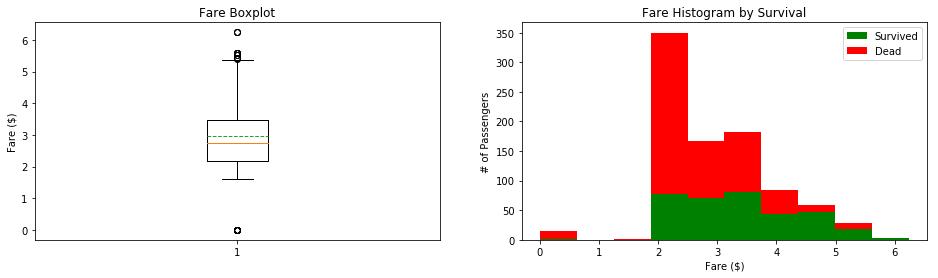

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 定义画布大小
plt.figure(figsize=[16, 4])
# 画第一个图
plt.subplot(121)
plt.boxplot(x=train['Fare'], showmeans=True, meanline=True)
# 设置标题和 y 轴的标签
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')
# 画第二个图
plt.subplot(122)
plt.hist(x=[train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
# 设置标题和坐标轴的标签
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

#### Age


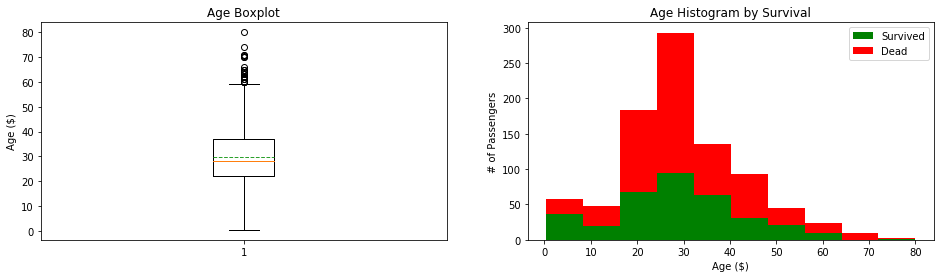

In [482]:
# 定义画布大小
plt.figure(figsize=[16, 4])
# 画第一个图
plt.subplot(121)
plt.boxplot(x=train['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age ($)')
# 画第二个图
plt.subplot(122)
plt.hist(x=[train[train['Survived'] == 1]['Age'], train[train['Survived'] == 0]['Age']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age ($)')
plt.ylabel('# of Passengers')
plt.legend()

可以看出30岁是主要乘客年龄，死亡也是最多的

#### 家庭人数

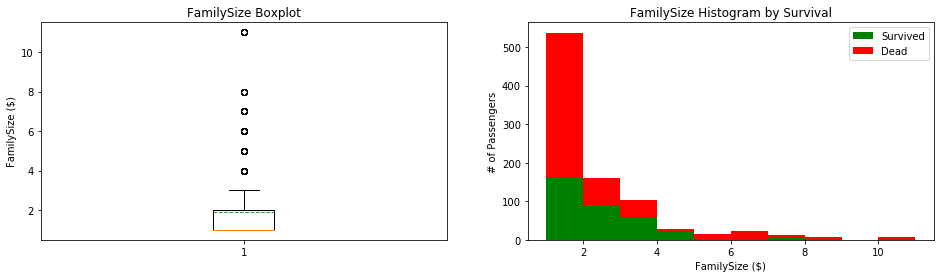

In [223]:
plt.figure(figsize=[16, 4])
# 画第一个图
plt.subplot(121)
plt.boxplot(x=train['FamilySize'], showmeans=True, meanline=True)
plt.title('FamilySize Boxplot')
plt.ylabel('FamilySize ($)')
# 画第二个图
plt.subplot(122)
plt.hist(x=[train[train['Survived'] == 1]['FamilySize'], train[train['Survived'] == 0]['FamilySize']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize ($)')
plt.ylabel('# of Passengers')
plt.legend()

####  柱状图来查看，港口（Embarked）、船舱等级（Pclass）、是否单身（IsAlone）的分布情况

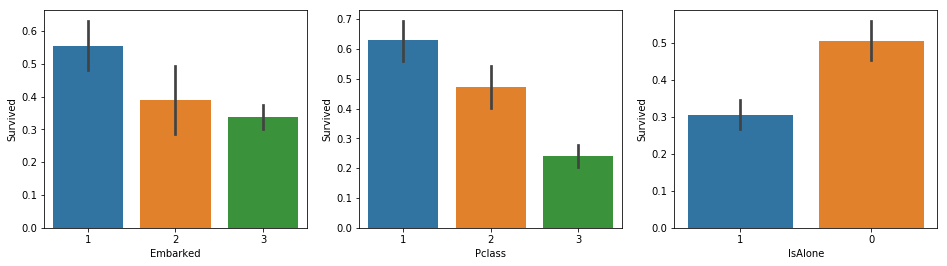

In [224]:
fig, saxis = plt.subplots(1, 3, figsize=(16, 4))
# 画柱状图
sns.barplot(x='Embarked', y='Survived', data=train, ax=saxis[0])
sns.barplot(x='Pclass', y='Survived', order=[
            1, 2, 3], data=train, ax=saxis[1])
sns.barplot(x='IsAlone', y='Survived', order=[1, 0], data=train, ax=saxis[2])

#### 使用点图来画出票价等级列（FareBin）、年龄等级列（AgeBin）、家庭人数列（FamilySize）。这样便于观察其趋势。

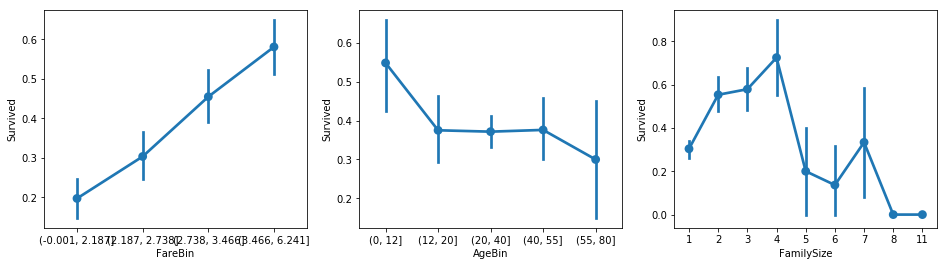

In [483]:
fig, saxis = plt.subplots(1, 3, figsize=(16, 4))
sns.pointplot(x='FareBin', y='Survived',  data=train, ax=saxis[0])
sns.pointplot(x='AgeBin', y='Survived',  data=train, ax=saxis[1])
sns.pointplot(x='FamilySize', y='Survived', data=train, ax=saxis[2])

#### 画出船舱等级特征和其他特征组合与是否存活的关系。

In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived',
               data=train, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=train, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

由上图可知，船舱等级为 1 时的票价要高一些，同时存活率也要高一些。

#### 使用柱状图来画出性别特征和其他特征组合及其与是否存活的关系。

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

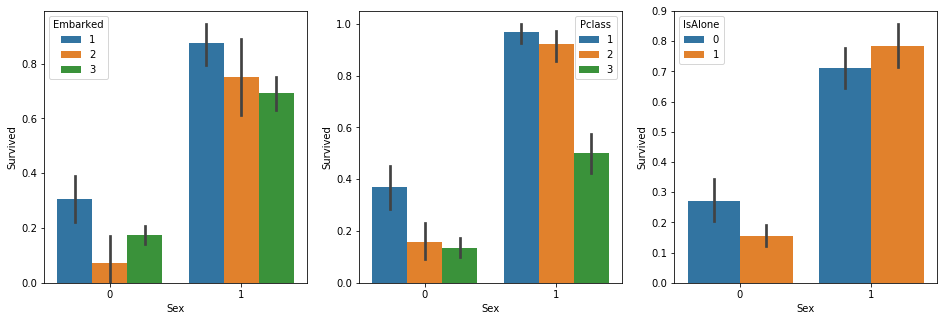

In [226]:
fig, qaxis = plt.subplots(1, 3, figsize=(16, 5))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=train, ax=qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train, ax=qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=train, ax=qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

女性的存活率普遍都高于男性的存活率。但在最右边的图中，男性单身汉死亡率高一点，而非单身汉死亡率要低一些。对于女性正好相反，单身女性的死亡率要低一些。非单身女性死亡率要高一些。

#### 登船港、船舱等级、乘客性别以及是否存活的关系。

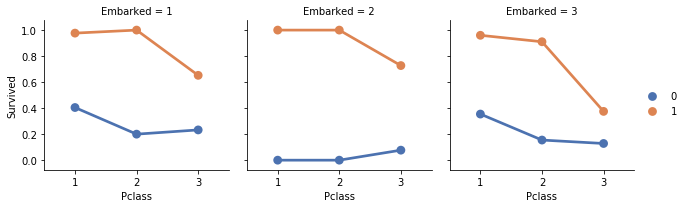

In [227]:
e = sns.FacetGrid(train, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=9.0, palette='deep')
e.add_legend()

从上图可以很明显的看出，当 Embarked=C 时，男性的存活率要整体高于女性的存活率。

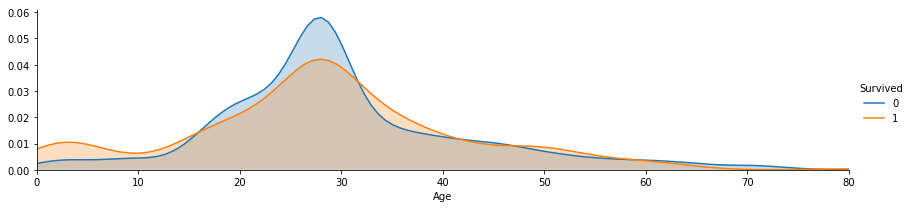

In [374]:
a = sns.FacetGrid(train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, train['Age'].max()))
a.add_legend()

从上图可以看出，登船乘客的年龄大部分为年轻人，死亡人数超过存活人数的群体也都是在 20 岁到 33 岁区间。

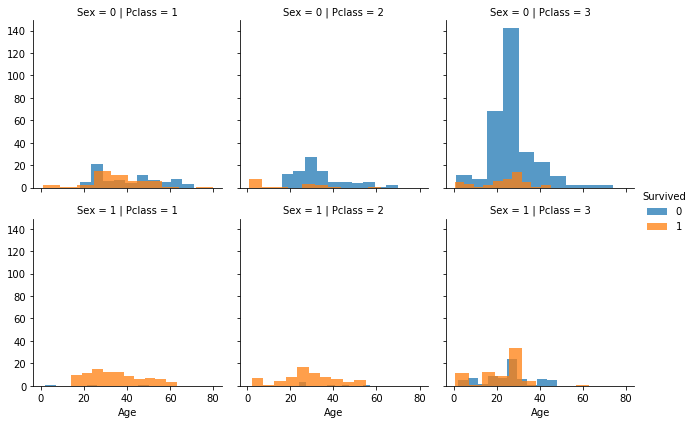

In [375]:
h = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

从上图可以看到，年龄在 20 岁到 40 之间，船舱等级为 3 的男性死亡率最高。

### 查看特征之间的关系
当然之前的热力图就是一个方式

In [484]:
pp = sns.pairplot(train, hue='Survived', palette='deep', height=1.5,
                  diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7d47c153b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(10, 8))  # 设置画布大小

    colormap = sns.diverging_palette(220, 10, as_cmap=True)  # 设置画图颜色

    _ = sns.heatmap(          # 画出热图
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 12}
    )
    # 设置标题
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


correlation_heatmap(train)

## 数据转换
基本完成了数据清洗和特征工程，还有些类别特征转为数值编码就可以了

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['Cabin_Code'] = label.fit_transform(train['Cabin'])
train['FareBin_Code'] = label.fit_transform(train['FareBin'])
train['AgeBin_Code'] = label.fit_transform(train['AgeBin'])

In [30]:
train[['Cabin_Code','FareBin_Code','AgeBin_Code']][:20]

,Cabin_Code,FareBin_Code,AgeBin_Code
0,8,0,2
1,2,3,2
2,8,1,2
3,2,3,2
4,8,1,2
5,8,1,2
6,4,3,3
7,8,2,0
8,8,1,2
9,8,2,1


In [31]:
drop_column = ['PassengerId', 'Cabin','Name']
df_drop = train.drop(drop_column, axis=1)
df_drop.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_U', 'T_WC', 'T_WEP', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'Cabin_Code', 'FareBin_Code', 'AgeBin_Code'], dtype='object')

In [32]:
df_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,T_A4,T_A5,...,T_U,T_WC,T_WEP,FamilySize,IsAlone,AgeBin,FareBin,Cabin_Code,FareBin_Code,AgeBin_Code
0,0,3,0,22.0,1,0,2.110213,3,0,1,...,0,0,0,2,0,"(20, 40]","(-0.001, 2.187]",8,0,2
1,1,1,1,38.0,1,0,4.280593,1,0,0,...,0,0,0,2,0,"(20, 40]","(3.466, 6.241]",2,3,2
2,1,3,1,26.0,0,0,2.188856,3,0,0,...,0,0,0,1,1,"(20, 40]","(2.187, 2.738]",8,1,2
3,1,1,1,35.0,1,0,3.990834,3,0,0,...,1,0,0,2,0,"(20, 40]","(3.466, 6.241]",2,3,2
4,0,3,0,35.0,0,0,2.202765,3,0,0,...,1,0,0,1,1,"(20, 40]","(2.187, 2.738]",8,1,2


###  选择特征

In [33]:
feat_cols = ['Sex', 'Pclass', 'Embarked',
             'Cabin_Code', 'Parch','SibSp', 'IsAlone','AgeBin_Code', 'FareBin_Code']
data_X = df_drop[feat_cols]
data_y = df_drop[target]
data_X.describe()


,Sex,Pclass,Embarked,Cabin_Code,Parch,SibSp,IsAlone,AgeBin_Code,FareBin_Code
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,2.308642,2.536476,6.716049,0.381594,0.523008,0.602694,1.949495,1.497194
std,0.477990,0.836071,0.791503,2.460739,0.806057,1.102743,0.489615,0.883511,1.118156
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.500000
50%,0.000000,3.000000,3.000000,8.000000,0.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,3.000000,3.000000,8.000000,0.000000,1.000000,1.000000,2.000000,2.000000
max,1.000000,3.000000,3.000000,8.000000,6.000000,8.000000,1.000000,4.000000,3.000000


### 归一化


 

In [34]:

from sklearn import preprocessing

minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
data_X=minmax_scale.fit_transform(data_X)#归一化

## 建模
### 过采样处理不平衡


In [35]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled_smote, y_resampled_smote = SMOTE().fit_sample(data_X, data_y)
sorted(Counter(y_resampled_smote).items())

[(0, 549), (1, 549)]


### 分训练集测试集

In [36]:
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_resampled_smote,
                                                                    y_resampled_smote.values,
                                                                    random_state=0)

###  k近邻算法
训练模型,评估

最优参数:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.8363636363636363
0.8363636363636363
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       139
           1       0.85      0.81      0.83       136

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



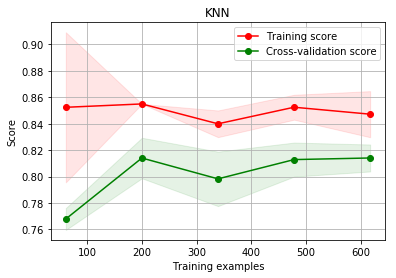

In [37]:
## from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #导入最近邻算法中的KNN最近邻分类包
from sklearn.metrics import accuracy_score #计算精度得分
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve


scoring = make_scorer(accuracy_score, greater_is_better=True)

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_ 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt 
    
#model = LogisticRegression(solver='lbfgs')
#LR = LogisticRegression(random_state=0,solver='lbfgs',penalty='l2')
#LR.fit(X_train, Y_train)
#knn = KNeighborsClassifier(n_neighbors=20, weights= 'distance', algorithm='auto',
#                           leaf_size=5, p=1, metric='minkowski', metric_params=None, n_jobs=-1)
KNN = KNeighborsClassifier(weights='uniform')
parameters = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'p':[1,2]}
clf_knn = get_model(KNN, parameters, X_train, Y_train, scoring)
print("最优参数: " ,clf_knn)
print(accuracy_score(Y_test, clf_knn.predict(X_test)))
plot_learning_curve(clf_knn, 'KNN', X_train, Y_train, cv=4)

knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

knn.fit(X_train, Y_train) #knn拟合序列集
predictions = knn.predict(X_test) #预测验证集
print(accuracy_score(Y_test, predictions)) #验证集精度得分
 
print(classification_report(Y_test,predictions))

### 逻辑回归


最优参数:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7927272727272727
0.7963636363636364
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       139
           1       0.82      0.76      0.79       136

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



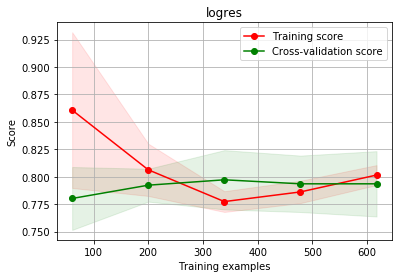

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #计算精度得分
from sklearn.metrics import classification_report

parameters = { 'penalty' : ['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR = LogisticRegression(random_state=0,solver='lbfgs')
logitregres = get_model(LR, parameters, X_train, Y_train, scoring)
print("最优参数: " ,logitregres)
print(accuracy_score(Y_test, logitregres.predict(X_test)))

plot_learning_curve(logitregres, 'logres', X_train, Y_train, cv=4)

LR1 = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR1.fit(X_train, Y_train)
predictions = LR1.predict(X_test) #预测验证集
print(accuracy_score(Y_test, predictions)) #验证集精度得分
 
print(classification_report(Y_test,predictions))

###  SVM支持向量机

最优参数:  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.8327272727272728


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

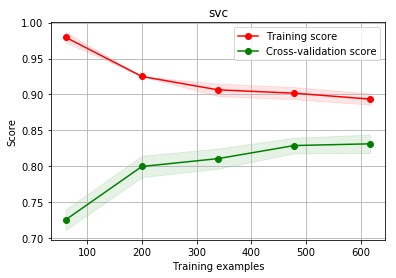

In [39]:
from sklearn.svm import SVC

SVC = SVC(probability=True, gamma='auto')

parameters = {'kernel':['linear','rbf'],'C':[1,10,100,300],'gamma':[0.001,0.01,1,10,100]}

svc = get_model(SVC, parameters, X_train, Y_train, scoring)

print("最优参数: " ,svc)
print(accuracy_score(Y_test, svc.predict(X_test)))

plot_learning_curve(svc, 'svc', X_train, Y_train, cv=4)
 

### 决策树&随机森林

最优参数:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.8327272727272728


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

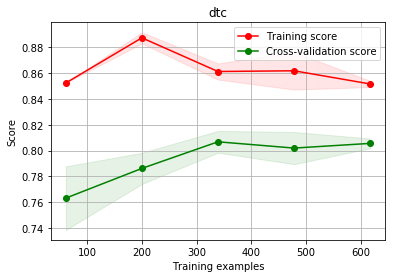

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

 
# 参数表
param_grid = [
    {'criterion': ['entropy'], 'min_impurity_decrease': np.linspace(0, 1, 50), 'max_depth': range(2, 10),
    'min_samples_split': range(2, 30, 2)},
    {'criterion': ['gini'], 'min_impurity_decrease': np.linspace(0, 0.5, 50), 'max_depth': range(2, 10),
    'min_samples_split': range(2, 30, 2)}
    ] 
    
DTC = DecisionTreeClassifier()
dtc = get_model(DTC, param_grid, X_train, Y_train, scoring)

print("最优参数: " ,dtc)
print(accuracy_score(Y_test, dtc.predict(X_test)))

plot_learning_curve(dtc, 'dtc', X_train, Y_train, cv=4)
 

最优参数:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.84


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

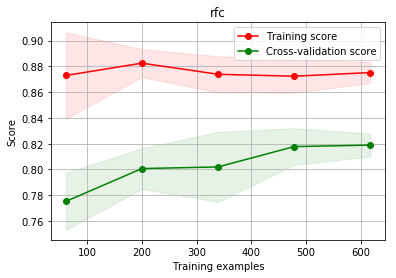

In [42]:
## 随机森林
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': [4,5,6,7,8,9],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 8],
    'n_estimators': [5, 10, 50,60,70,80,90,100]
} 
RFC = RandomForestClassifier()

rfc =  get_model(RFC, param_grid, X_train, Y_train, scoring)

print("最优参数: " ,rfc)
print(accuracy_score(Y_test, rfc.predict(X_test)))

plot_learning_curve(rfc, 'rfc', X_train, Y_train, cv=4)

### boosting （lightgbm）

In [48]:
import lightgbm as lgbm

gbm  = lgbm.sklearn.LGBMClassifier(  n_estimators=50  )

gbm.fit(X_train, Y_train)
print(accuracy_score(Y_test, gbm.predict(X_test)))

0.8254545454545454


### stacking

In [49]:
from mlxtend.classifier import StackingClassifier


sclf = StackingClassifier(classifiers=[ svc, knn, rfc,gbm], 
                          meta_classifier=LR1)
 
print('4-fold cross validation:\n')
 
for clf, label in zip([svc, knn, rfc,gbm,sclf], 
                      [ 'svm', 
                       'KNN',
                       'random forests',
                          'lightgbm',
                      'StackingClassifier']):
 
    scores = model_selection.cross_val_score(clf, X_train, Y_train, 
                                              cv=4, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label)) 

4-fold cross validation:

Accuracy: 0.83 (+/- 0.01) [svm]
Accuracy: 0.81 (+/- 0.01) [KNN]
Accuracy: 0.82 (+/- 0.01) [random forests]
Accuracy: 0.82 (+/- 0.02) [lightgbm]
Accuracy: 0.83 (+/- 0.01) [StackingClassifier]


##  预测

###  预处理测试集


In [540]:
if os.name == "nt":
    dataPath = "%s\\input\test.csv" % homePath
else:
    dataPath = "%s/input/test.csv" % homePath
test = readData(dataPath)
    
index = list(test[test['Age'].isnull()].index) #Age 缺失样例的 index
Age_median1 = test[test['Age'].notnull()]['Age'].median() #求平均值
copy_data = test.copy()
for i in index:  #缺失样例的三个变量相等的组成一组
    filling_age1 = np.mean(copy_data[(copy_data['Pclass'] == copy_data.iloc[i]['Pclass'])
                                    & (copy_data['SibSp'] == copy_data.iloc[i]['SibSp'])
                                    & (copy_data['Parch'] == copy_data.iloc[i]['Parch'])
                                    ]['Age'])
    if not np.isnan(filling_age1): # filling_age 非空为真
        test['Age'].iloc[i] = filling_age1 #填充 null 值
    else: # filling_age 空为真
        test['Age'].iloc[i] = Age_median  #如果还是空就用中位数
    
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
map_embarked = {'C':1,'Q':2,'S':3}
test['Embarked']=test['Embarked'].map(map_embarked)


test['Cabin'].fillna('U',inplace=True) 

# 使用 lambda 表达式定义匿名函数对 i 执行 list(i)[0]。map() 指对指定序列 data ['Cabin'] 进行映射，对每个元素执行 lambda 
test['Cabin']=test['Cabin'].map(lambda i: list(i)[0])   #取首字母
test['Fare']=test['Fare'].map(lambda i:np.log(1+i) if i>0 else 0)
sex_map = {'female': 1, 'male': 0}
test['Sex']=test['Sex'].map(sex_map)
Ticket=[]
import re
r=re.compile(r'\w*')#正则表达式，查找所有单词字符[a-z/A-Z/0-9]
for i in test['Ticket']:
    sp=i.split(' ')#拆分空格前后字符串，返回列表
    if len(sp)==1:
       Ticket.append('U')#对于只有一串数字的 Ticket，Ticket 增加字符 'U'
    else:
       t=r.findall(sp[0])#查找所有单词字符，忽略符号，返回列表
       Ticket.append(''.join(t))#将 t 中所有字符串合并
test['Ticket']=Ticket
#get_dummies：如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）
test=pd.get_dummies(test,columns=['Ticket'],prefix='T')

# 这里规避A value is trying to be set on a copy of a slice from a DataFrame
test = test.copy()
# 这里将大于上四分位数(Q3)的设定为异常值
# df_['isOutlier'] = s > s.quantile(0.75)
Q1 = np.percentile(test['Fare'], 25)
# 3rd quartile (75%)
Q3 = np.percentile(test['Fare'], 75)
# quartile spacing (IQR)
IQR = Q3 - Q1
# outlier step
outlier_step = 1.5 * IQR
col = test[((test['Fare'] < Q1 - outlier_step) | (test['Fare'] > Q3 + outlier_step))].index
for ind in col:
    if ( test.loc[ind]['Fare'] <  Q1 - outlier_step ):
        test = test.copy()
        test.loc[ind]['Fare'] =  Q1 - outlier_step
    else :
        test.loc[ind]['Fare'] =  Q3 + outlier_step
 
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = 1
test['IsAlone'].loc[test['FamilySize'] > 1] = 0
bins = [0,12,20,40,55,80]
test['AgeBin'] = pd.cut(test['Age'], bins=bins)
test['FareBin'] = pd.qcut(test['Fare'], 4)
test['Cabin_Code'] = label.fit_transform(test['Cabin'])
test['FareBin_Code'] = label.fit_transform(test['FareBin'])
test['AgeBin_Code'] = label.fit_transform(test['AgeBin'])

feat_cols = ['Sex', 'Pclass', 'Embarked','Cabin_Code', 'Parch','SibSp', 'IsAlone','AgeBin_Code', 'FareBin_Code']
test_X = test[feat_cols]
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
test_X=minmax_scale.fit_transform(test_X)#归一化



In [524]:
#预测
test['Survived'] = knn.predict(test_X)
test[['PassengerId','Survived']].to_csv("output/knn.csv",index=0 )

#预测
test['Survived'] = LR.predict(test_X)
test[['PassengerId','Survived']].to_csv("output/logitregres.csv",index=0 )



0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles